# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :




Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [2]:
conda install python-graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\abdul\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.2               |       hd77b12b_6         109 KB
    lib

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

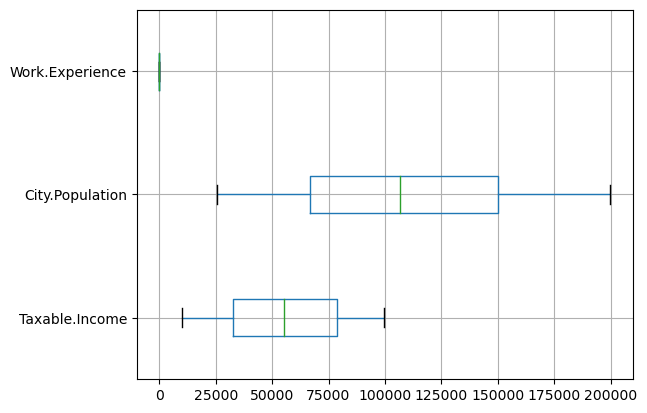

In [6]:
df.boxplot(vert = False)

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


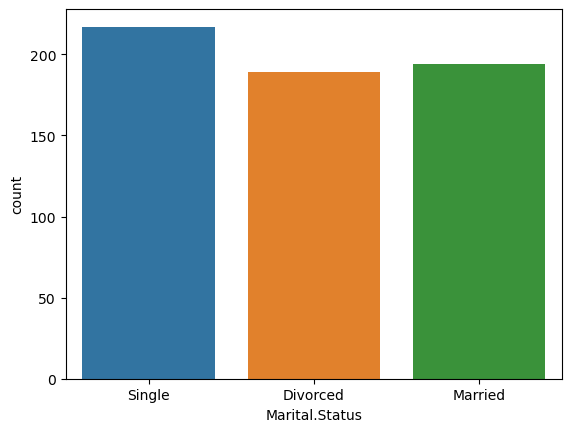

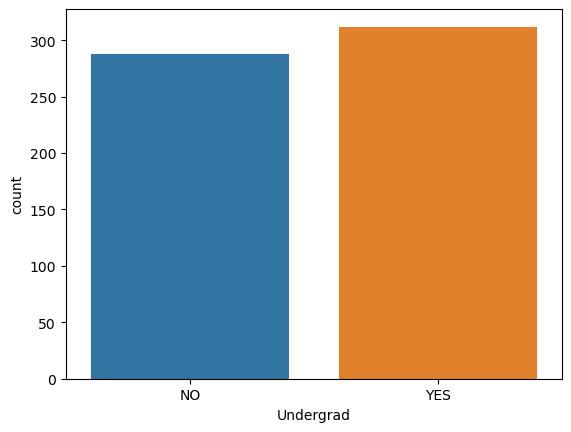

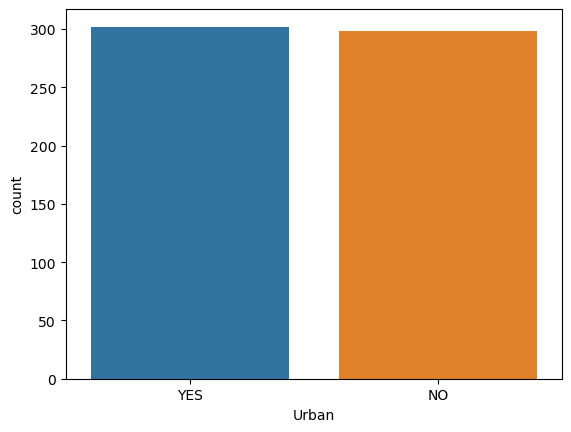

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Marital.Status'])
plt.show()
sns.countplot(df['Undergrad'])
plt.show()
sns.countplot(df['Urban'])
plt.show()

In [10]:
df['Taxable.Income'] = pd.cut(x=df['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'], right = False)
y=df['Taxable.Income']
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [11]:
y = df['Taxable.Income']
x = df.drop('Taxable.Income', axis = 1)

In [12]:
LE = LabelEncoder()
x['Undergrad']=LE.fit_transform(x['Undergrad'])
x['Marital.Status'] = LE.fit_transform(x['Marital.Status'])
x['Urban'] = LE.fit_transform(x["Urban"])

In [13]:
x


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y)
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
print("Number of nodes : ",DT.tree_.node_count)
print("Max depth of tree : ",DT.tree_.max_depth)
print("Accuracy score for train data : ",accuracy_score(Y_train, Y_pred_train))
print("Accuracy Score for  test data : ", accuracy_score(Y_test,Y_pred_test))

Number of nodes :  281
Max depth of tree :  27
Accuracy score for train data :  1.0
Accuracy Score for  test data :  0.64


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y)
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
print("Number of nodes : ",DT.tree_.node_count)
print("Max depth of tree : ",DT.tree_.max_depth)
print("Accuracy score for train data : ",accuracy_score(Y_train, Y_pred_train))
print("Accuracy Score for  test data : ", accuracy_score(Y_test,Y_pred_test))

Number of nodes :  15
Max depth of tree :  3
Accuracy score for train data :  0.82
Accuracy Score for  test data :  0.7333333333333333


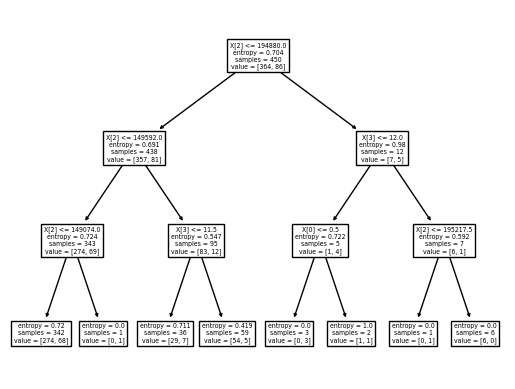

In [16]:
plt.show(tree.plot_tree(DT))

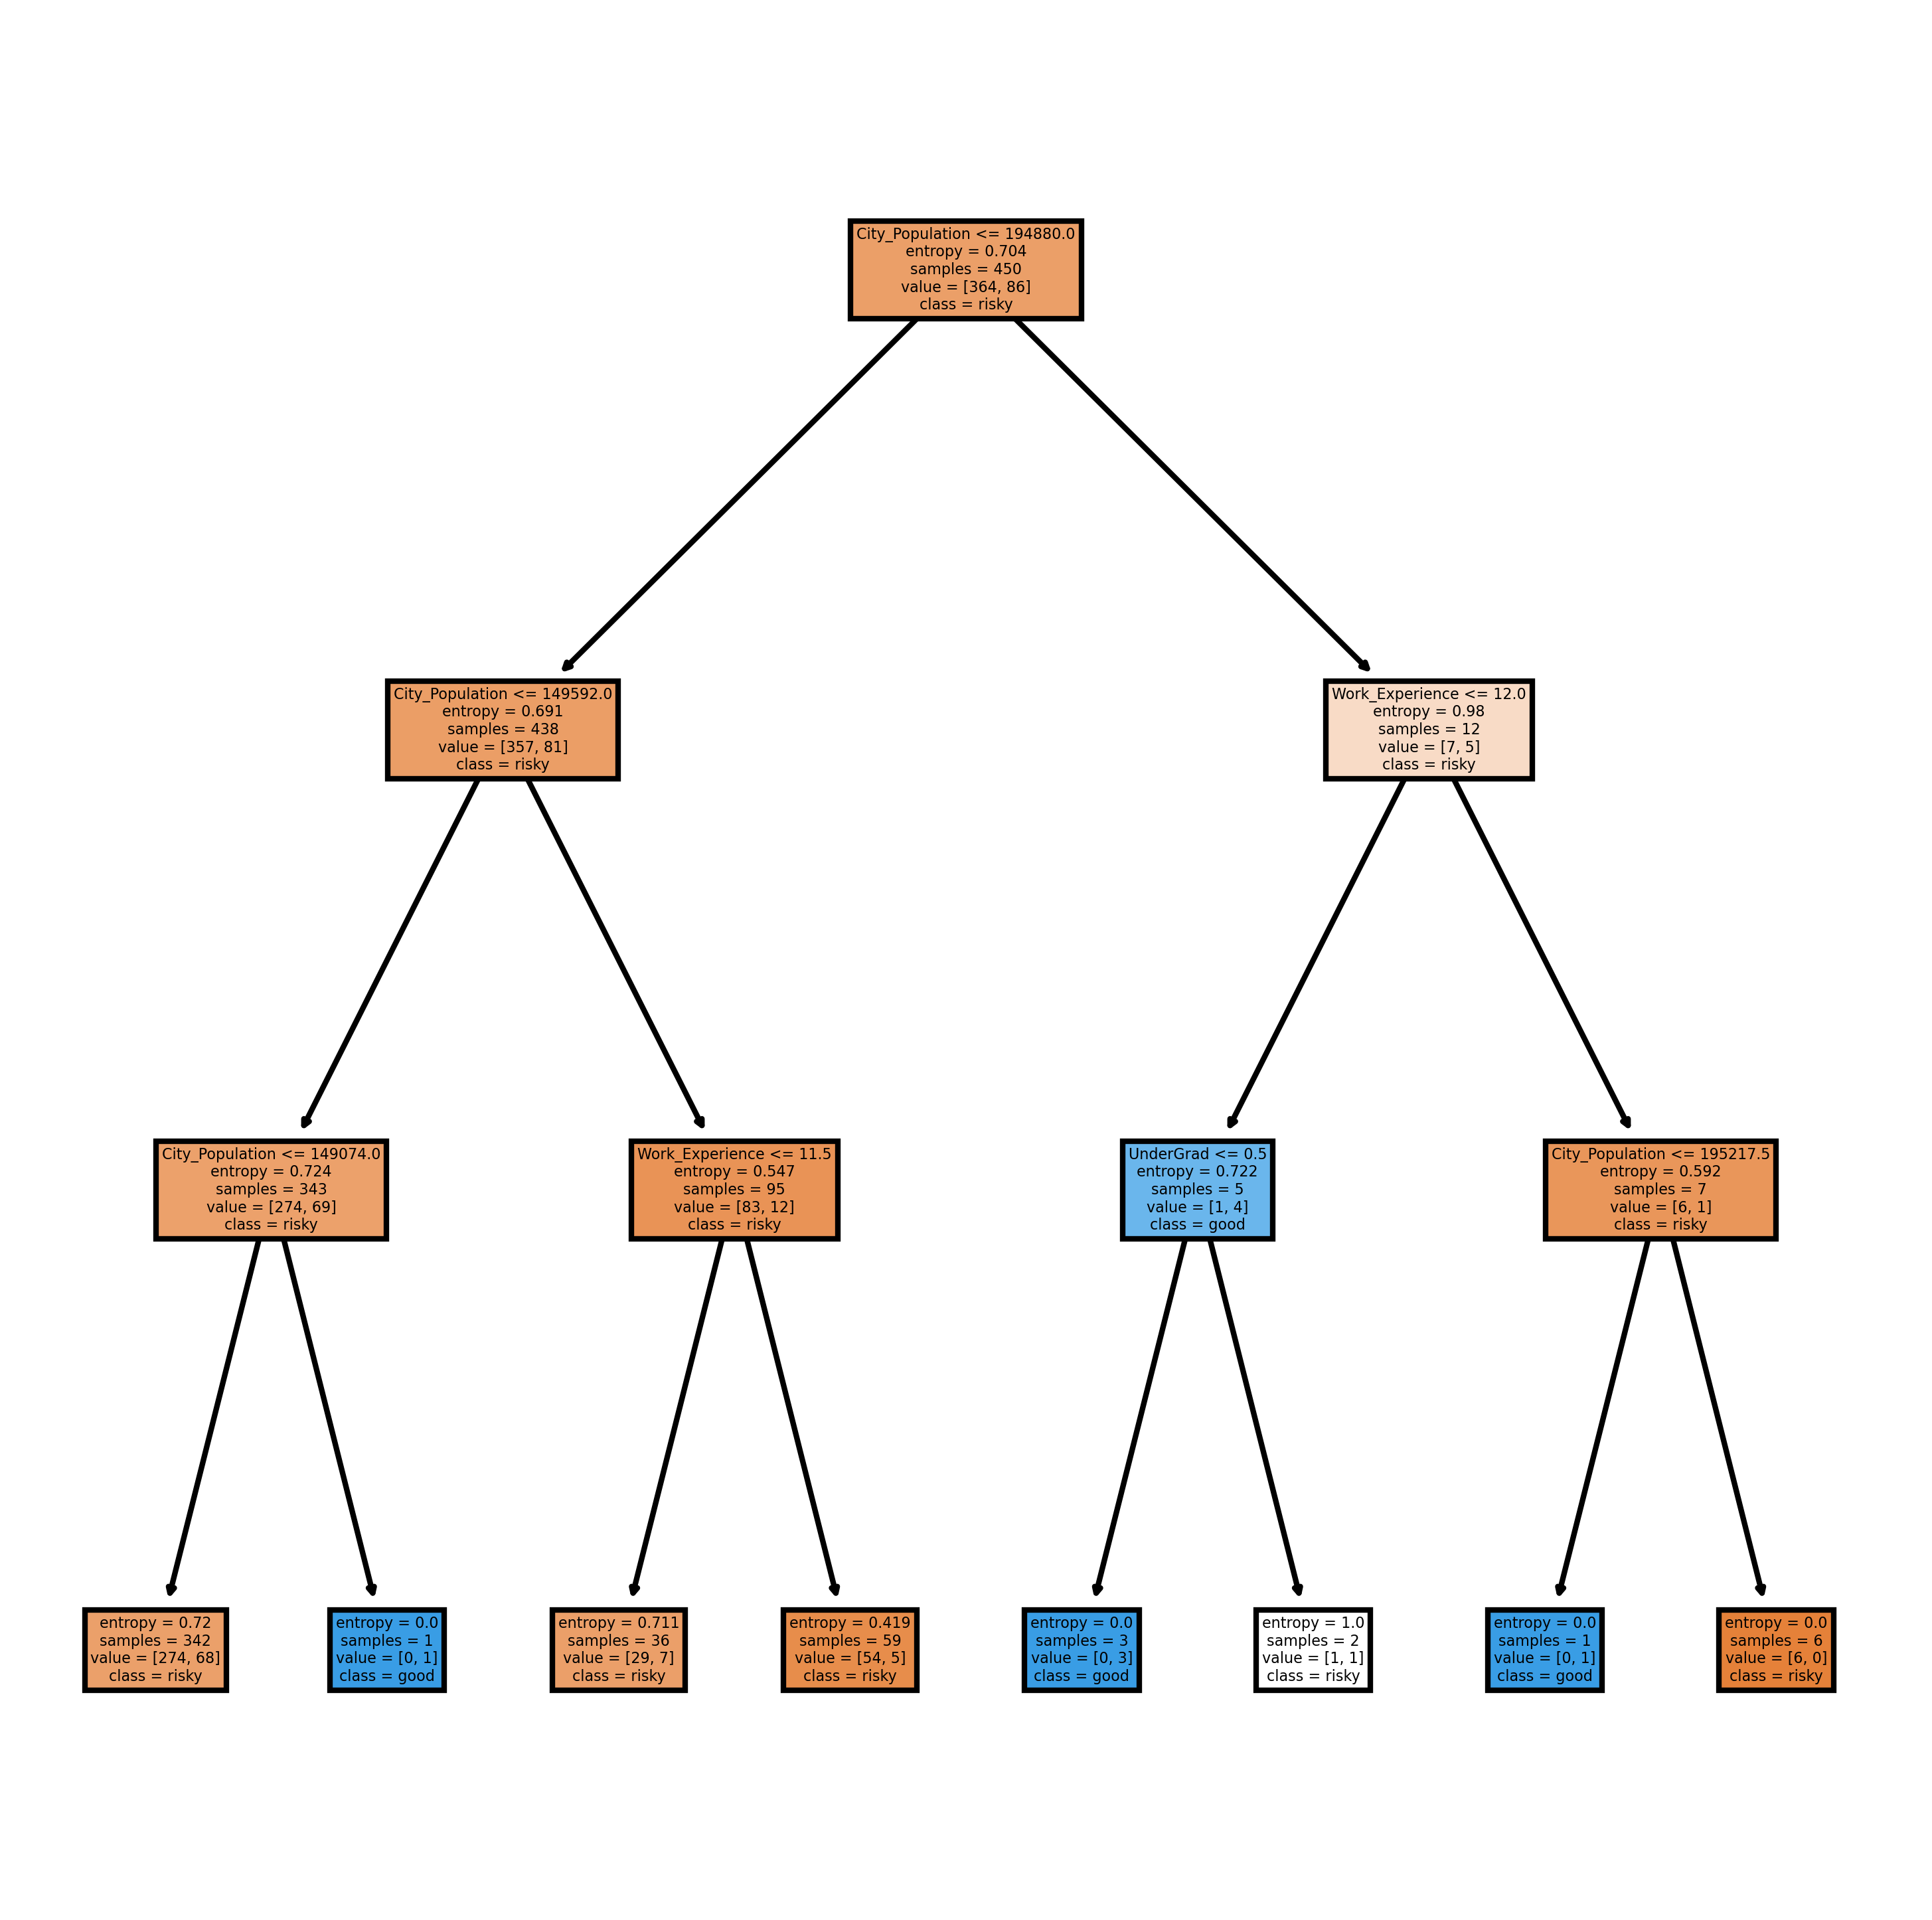

In [17]:
fn = ['UnderGrad','Marital_Status', 'City_Population','Work_Experience','Urban','Taxable_category']
cn = ['risky','good']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6), dpi=600)
tree.plot_tree(DT,feature_names = fn, class_names = cn, filled = True)
plt.show()

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3)
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
DTC.fit(X_train,Y_train)
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)
print("Number of nodes : ", DTC.tree_.node_count)
print("Max depth of the tree : ", DTC.tree_.max_depth)
print("Accuracy score for train data : ", accuracy_score(Y_train, Y_pred_train))
print("Accuracy score for test data : ", accuracy_score(Y_test, Y_pred_test))

Number of nodes :  13
Max depth of the tree :  3
Accuracy score for train data :  0.7952380952380952
Accuracy score for test data :  0.8111111111111111


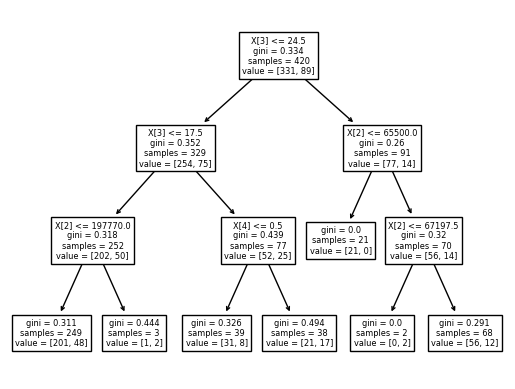

In [19]:
plt.show(tree.plot_tree(DTC))

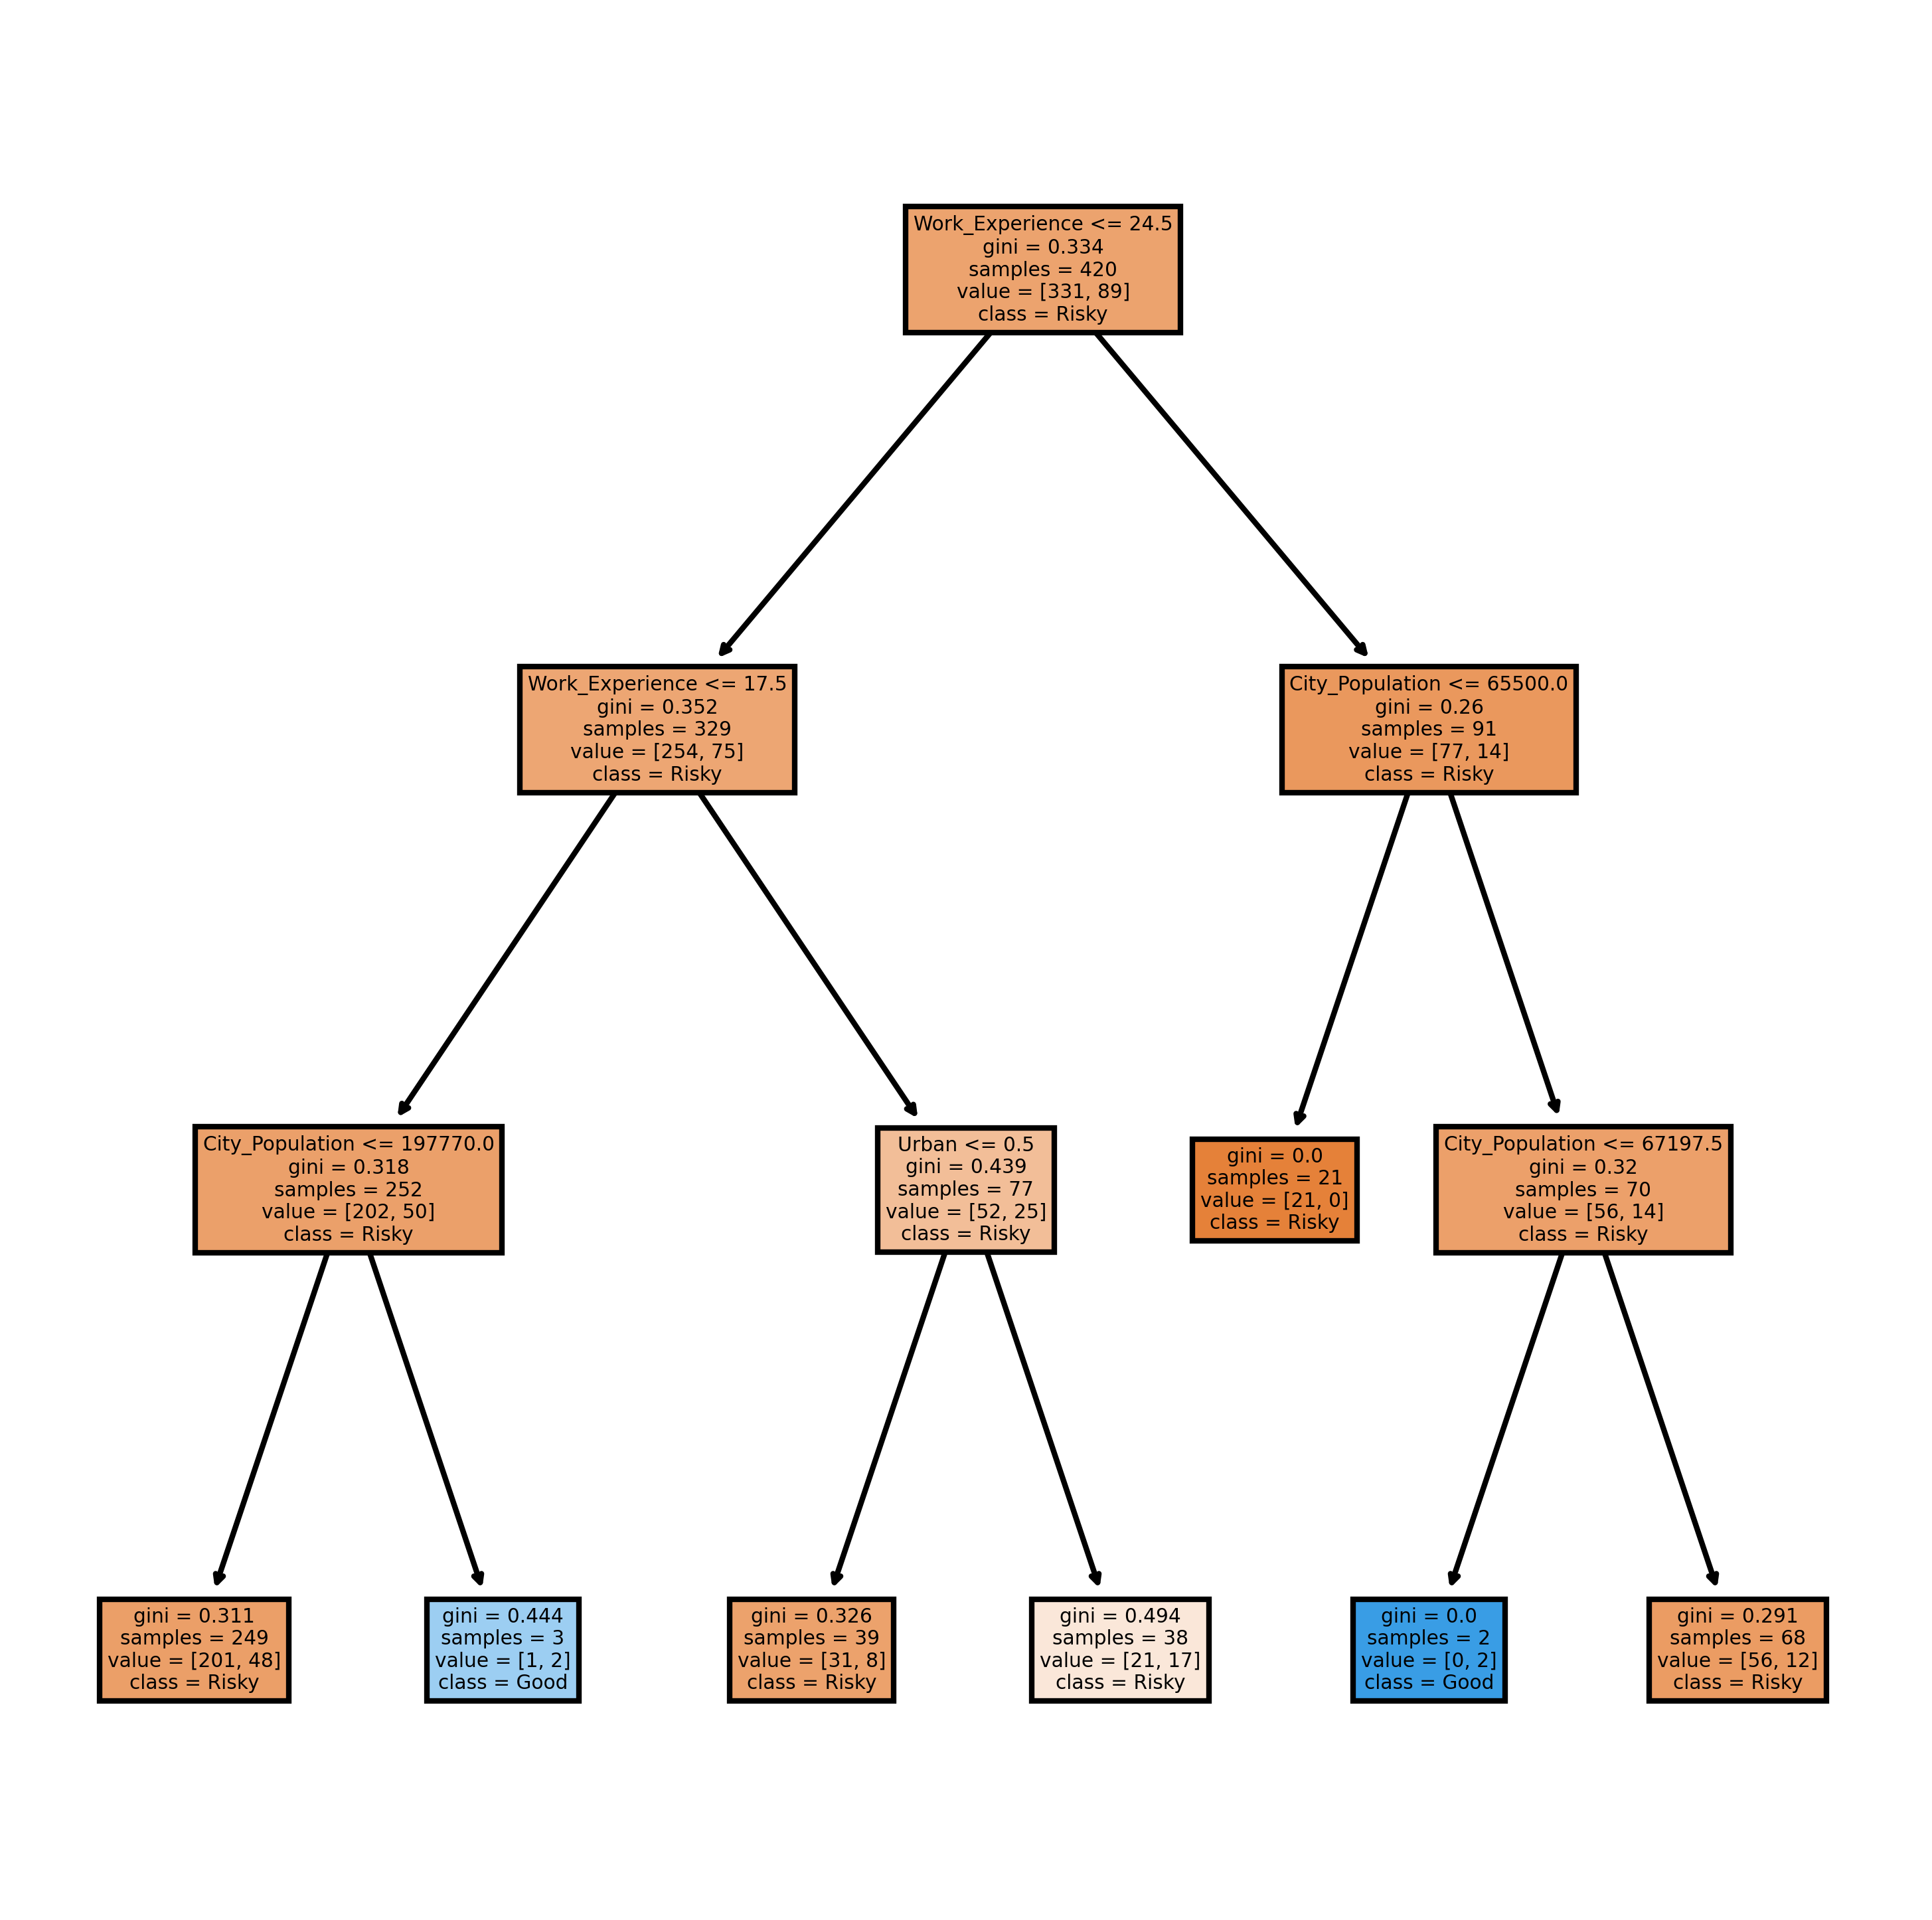

In [21]:
fn=['UnderGrad', 'Marital_Status', 'City_Population', 'Work_Experience','Urban', 'Taxable_Category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
plt.show(tree.plot_tree(DTC, feature_names = fn,class_names=cn,filled = True))


In [22]:
# Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

SyntaxError: invalid syntax (1278547663.py, line 6)

In [23]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [25]:
df['Sales'] = pd.cut(x=df['Sales'],bins = [0,6,12,17], labels = ['Low', 'Medium', 'High'], right = False )
df['CompPrice'] = pd.cut(x=df['CompPrice'],bins = [77,100,135,176], labels = ['Low', 'Medium', 'High'], right = False )
df['Income'] = pd.cut(x=df['Income'],bins = [21,70,92,120], labels = ['Low', 'Medium', 'High'], right = False )
df['Advertising'] = pd.cut(x=df['Advertising'],bins = [0,10,20,30], labels = ['Low', 'Medium', 'High'], right = False )
df['Population'] = pd.cut(x=df['Population'],bins = [10,140,400,510], labels = ['Low', 'Medium', 'High'], right = False )
df['Price'] = pd.cut(x=df['Price'],bins = [24,120,132,192], labels = ['Low', 'Medium', 'High'], right = False )
df['Age'] = pd.cut(x=df['Age'],bins = [25,40,70,81], labels = ['Low', 'Medium', 'High'], right = False )
df['Education'] = pd.cut(x=df['Education'],bins = [10,13,15,19], labels = ['Low', 'Medium', 'High'], right = False )

In [26]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,Medium,Medium,Medium,Medium,Bad,Medium,High,Yes,Yes
1,Medium,Medium,Low,Medium,Medium,Low,Good,Medium,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Low,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Low,Medium,Medium,Medium,Yes,Yes
4,Low,High,Low,Low,Medium,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,Medium,High,Medium,Medium,High,Yes,Yes
398,Low,Medium,Medium,Low,Medium,Low,Bad,Medium,Low,Yes,Yes


In [27]:
df.shape

(400, 11)

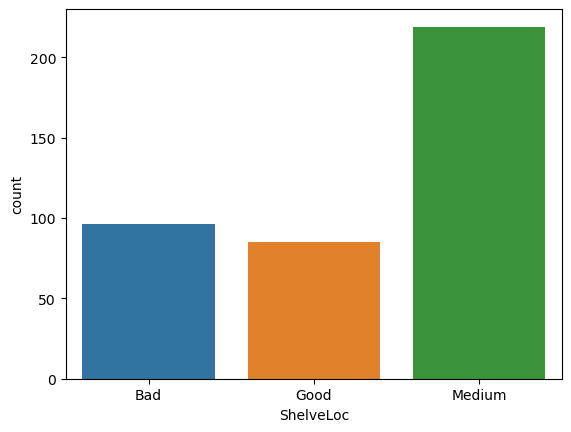

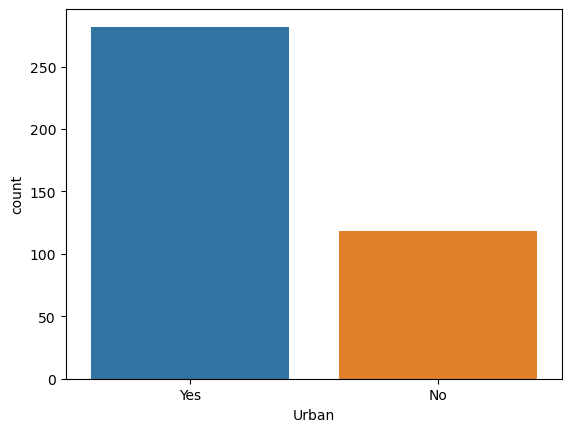

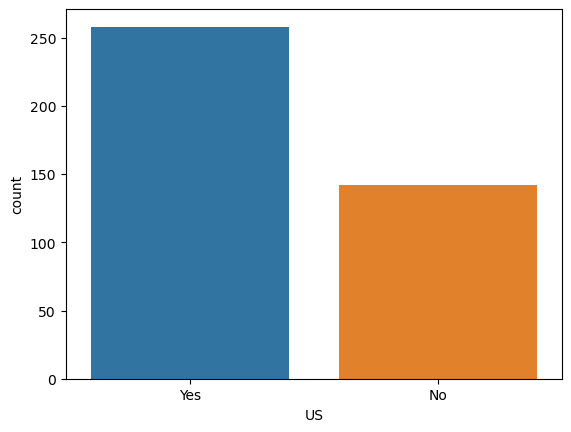

In [28]:
sns.countplot(df['ShelveLoc'])
plt.show()
sns.countplot(df['Urban'])
plt.show()
sns.countplot(df['US'])
plt.show()

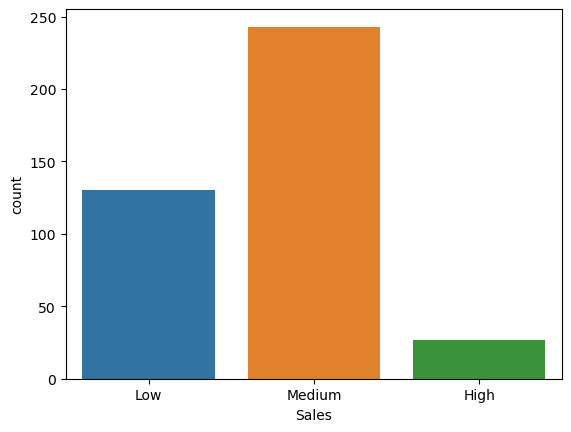

In [29]:
sns.countplot(df['Sales'])
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    category
 2   Income       396 non-null    category
 3   Advertising  400 non-null    category
 4   Population   400 non-null    category
 5   Price        400 non-null    category
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    category
 8   Education    400 non-null    category
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(8), object(3)
memory usage: 13.7+ KB


In [31]:
df.describe(),
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [34]:
df.corr()

""


In [35]:
for i in df.iloc[:,:]:
    df[i] = LE.fit_transform(df[i])

In [36]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,2,2,2,2,0,2,0,1,1
1,2,2,1,2,2,1,1,2,1,1,1
2,2,2,1,2,2,1,2,2,1,1,1
3,2,2,0,1,0,1,2,2,2,1,1
4,1,0,1,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,2,0,2,2,0,1,1
398,1,2,2,1,2,1,0,2,1,1,1


In [37]:
y = df['Sales']
x = df.drop('Sales',axis = 1)

In [38]:
aas=[]
aast= []
for i in range(1,1000): 
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3)
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train, Y_train)
    Y_pred_train = DTC.predict(X_train)
    Y_pred_test = DTC.predict(X_test)
    aas.append(accuracy_score(Y_train,Y_pred_train))
    aast.append(accuracy_score(Y_test, Y_pred_test))
print("Number of nodes : ",DTC.tree_.node_count)
print("Max Depth of a tree : ",DTC.tree_.max_depth)
print("Average Accuracy score for train data : ", np.mean(aas))
print("Average Accuracy score for test data : ", np.mean(aast))

Number of nodes :  221
Max Depth of a tree :  15
Average Accuracy score for train data :  0.9818246818246819
Average Accuracy score for test data :  0.5761511511511511


In [39]:
aas=[]
aast= []
for i in range(1,1000): 
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3)
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
    DTC.fit(X_train, Y_train)
    Y_pred_train = DTC.predict(X_train)
    Y_pred_test = DTC.predict(X_test)
    aas.append(accuracy_score(Y_train,Y_pred_train))
    aast.append(accuracy_score(Y_test, Y_pred_test))
print("Number of nodes : ",DTC.tree_.node_count)
print("Max Depth of a tree : ",DTC.tree_.max_depth)
print("Average Accuracy score for train data : ", np.mean(aas))
print("Average Accuracy score for test data : ", np.mean(aast))

Number of nodes :  15
Max Depth of a tree :  3
Average Accuracy score for train data :  0.7213463463463463
Average Accuracy score for test data :  0.6978645311978645


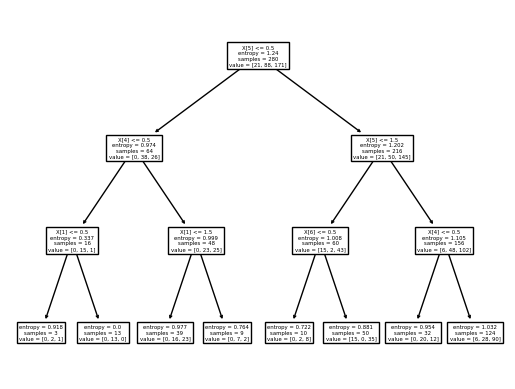

In [40]:
plt.show(tree.plot_tree(DTC))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int32
 1   CompPrice    400 non-null    int32
 2   Income       400 non-null    int32
 3   Advertising  400 non-null    int32
 4   Population   400 non-null    int32
 5   Price        400 non-null    int32
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int32
 8   Education    400 non-null    int32
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(11)
memory usage: 17.3 KB


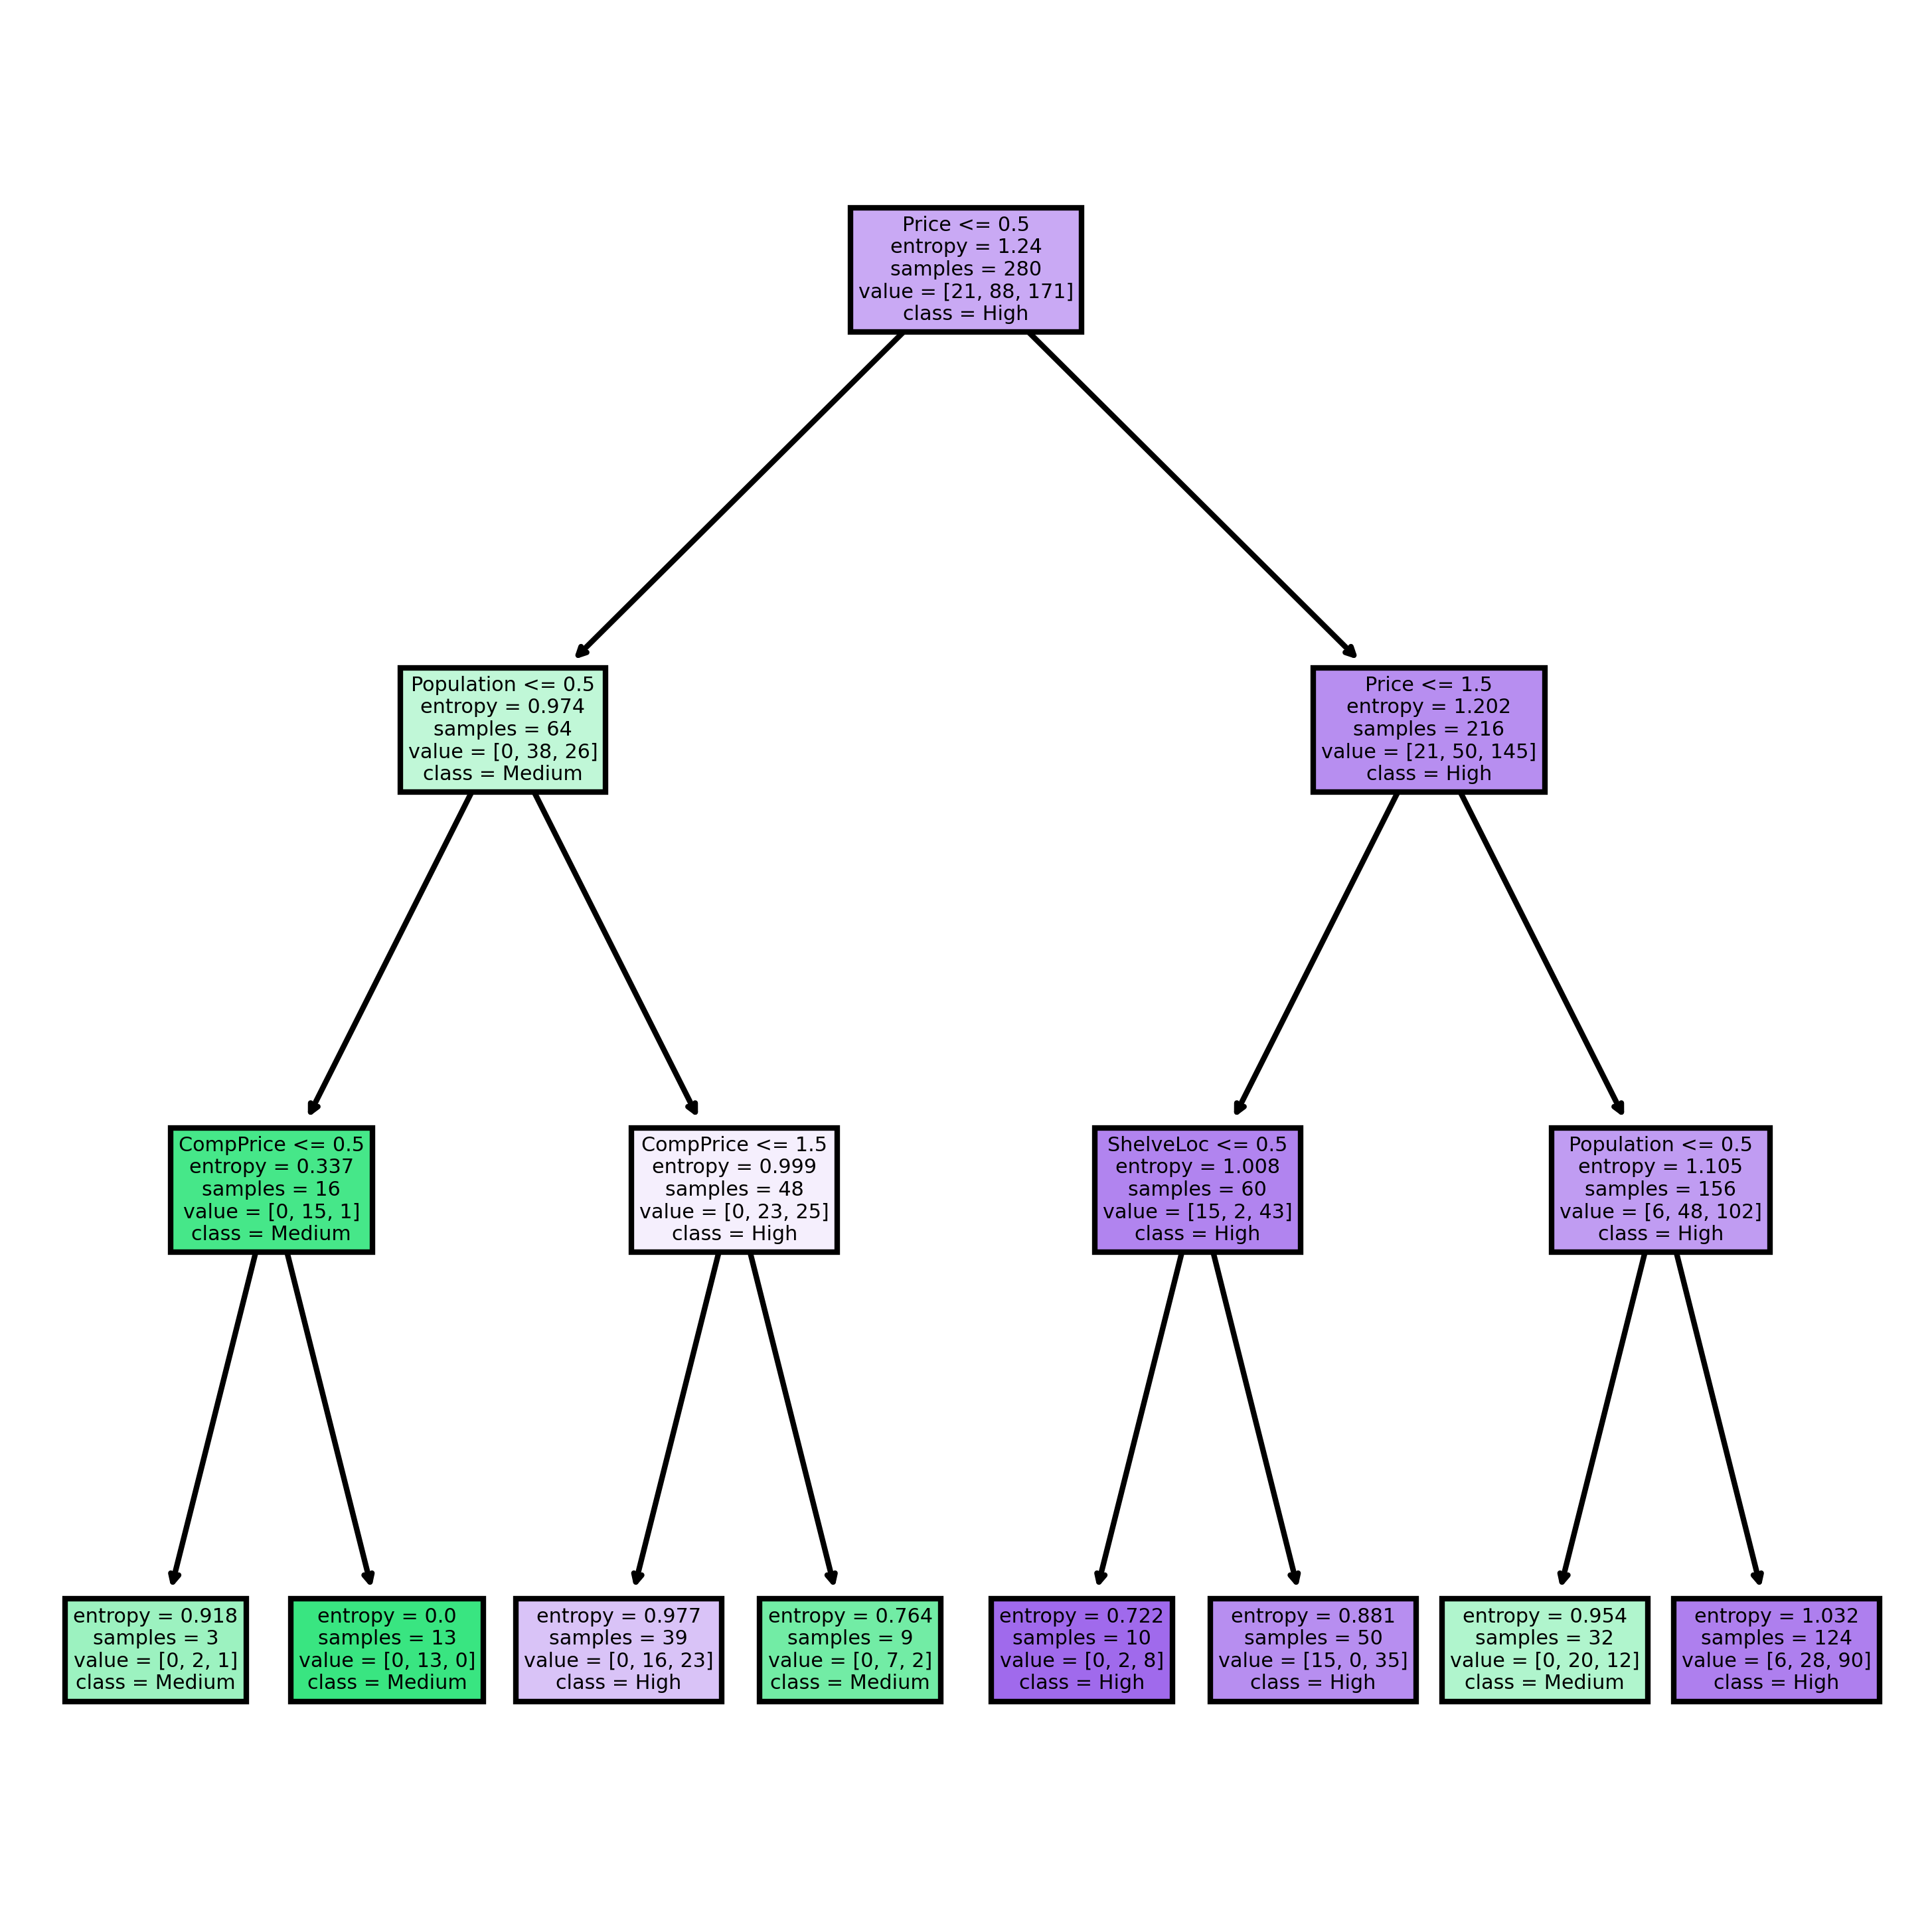

In [42]:
fn = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn = ['Low','Medium','High']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6,6), dpi = 600)
plt.show(tree.plot_tree(DTC, feature_names = fn, class_names = cn, filled = True))

In [43]:
np.mean(Y_pred_test == Y_test)

0.675

In [44]:
aas=[]
aast= []
for i in range(1,1000): 
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3)
    DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
    DTC.fit(X_train, Y_train)
    Y_pred_train = DTC.predict(X_train)
    Y_pred_test = DTC.predict(X_test)
    aas.append(accuracy_score(Y_train,Y_pred_train))
    aast.append(accuracy_score(Y_test, Y_pred_test))
print("Number of nodes : ",DTC.tree_.node_count)
print("Max Depth of a tree : ",DTC.tree_.max_depth)
print("Average Accuracy score for train data : ", np.mean(aas))
print("Average Accuracy score for test data : ", np.mean(aast))

Number of nodes :  15
Max Depth of a tree :  3
Average Accuracy score for train data :  0.7245423995423995
Average Accuracy score for test data :  0.6968301634968301


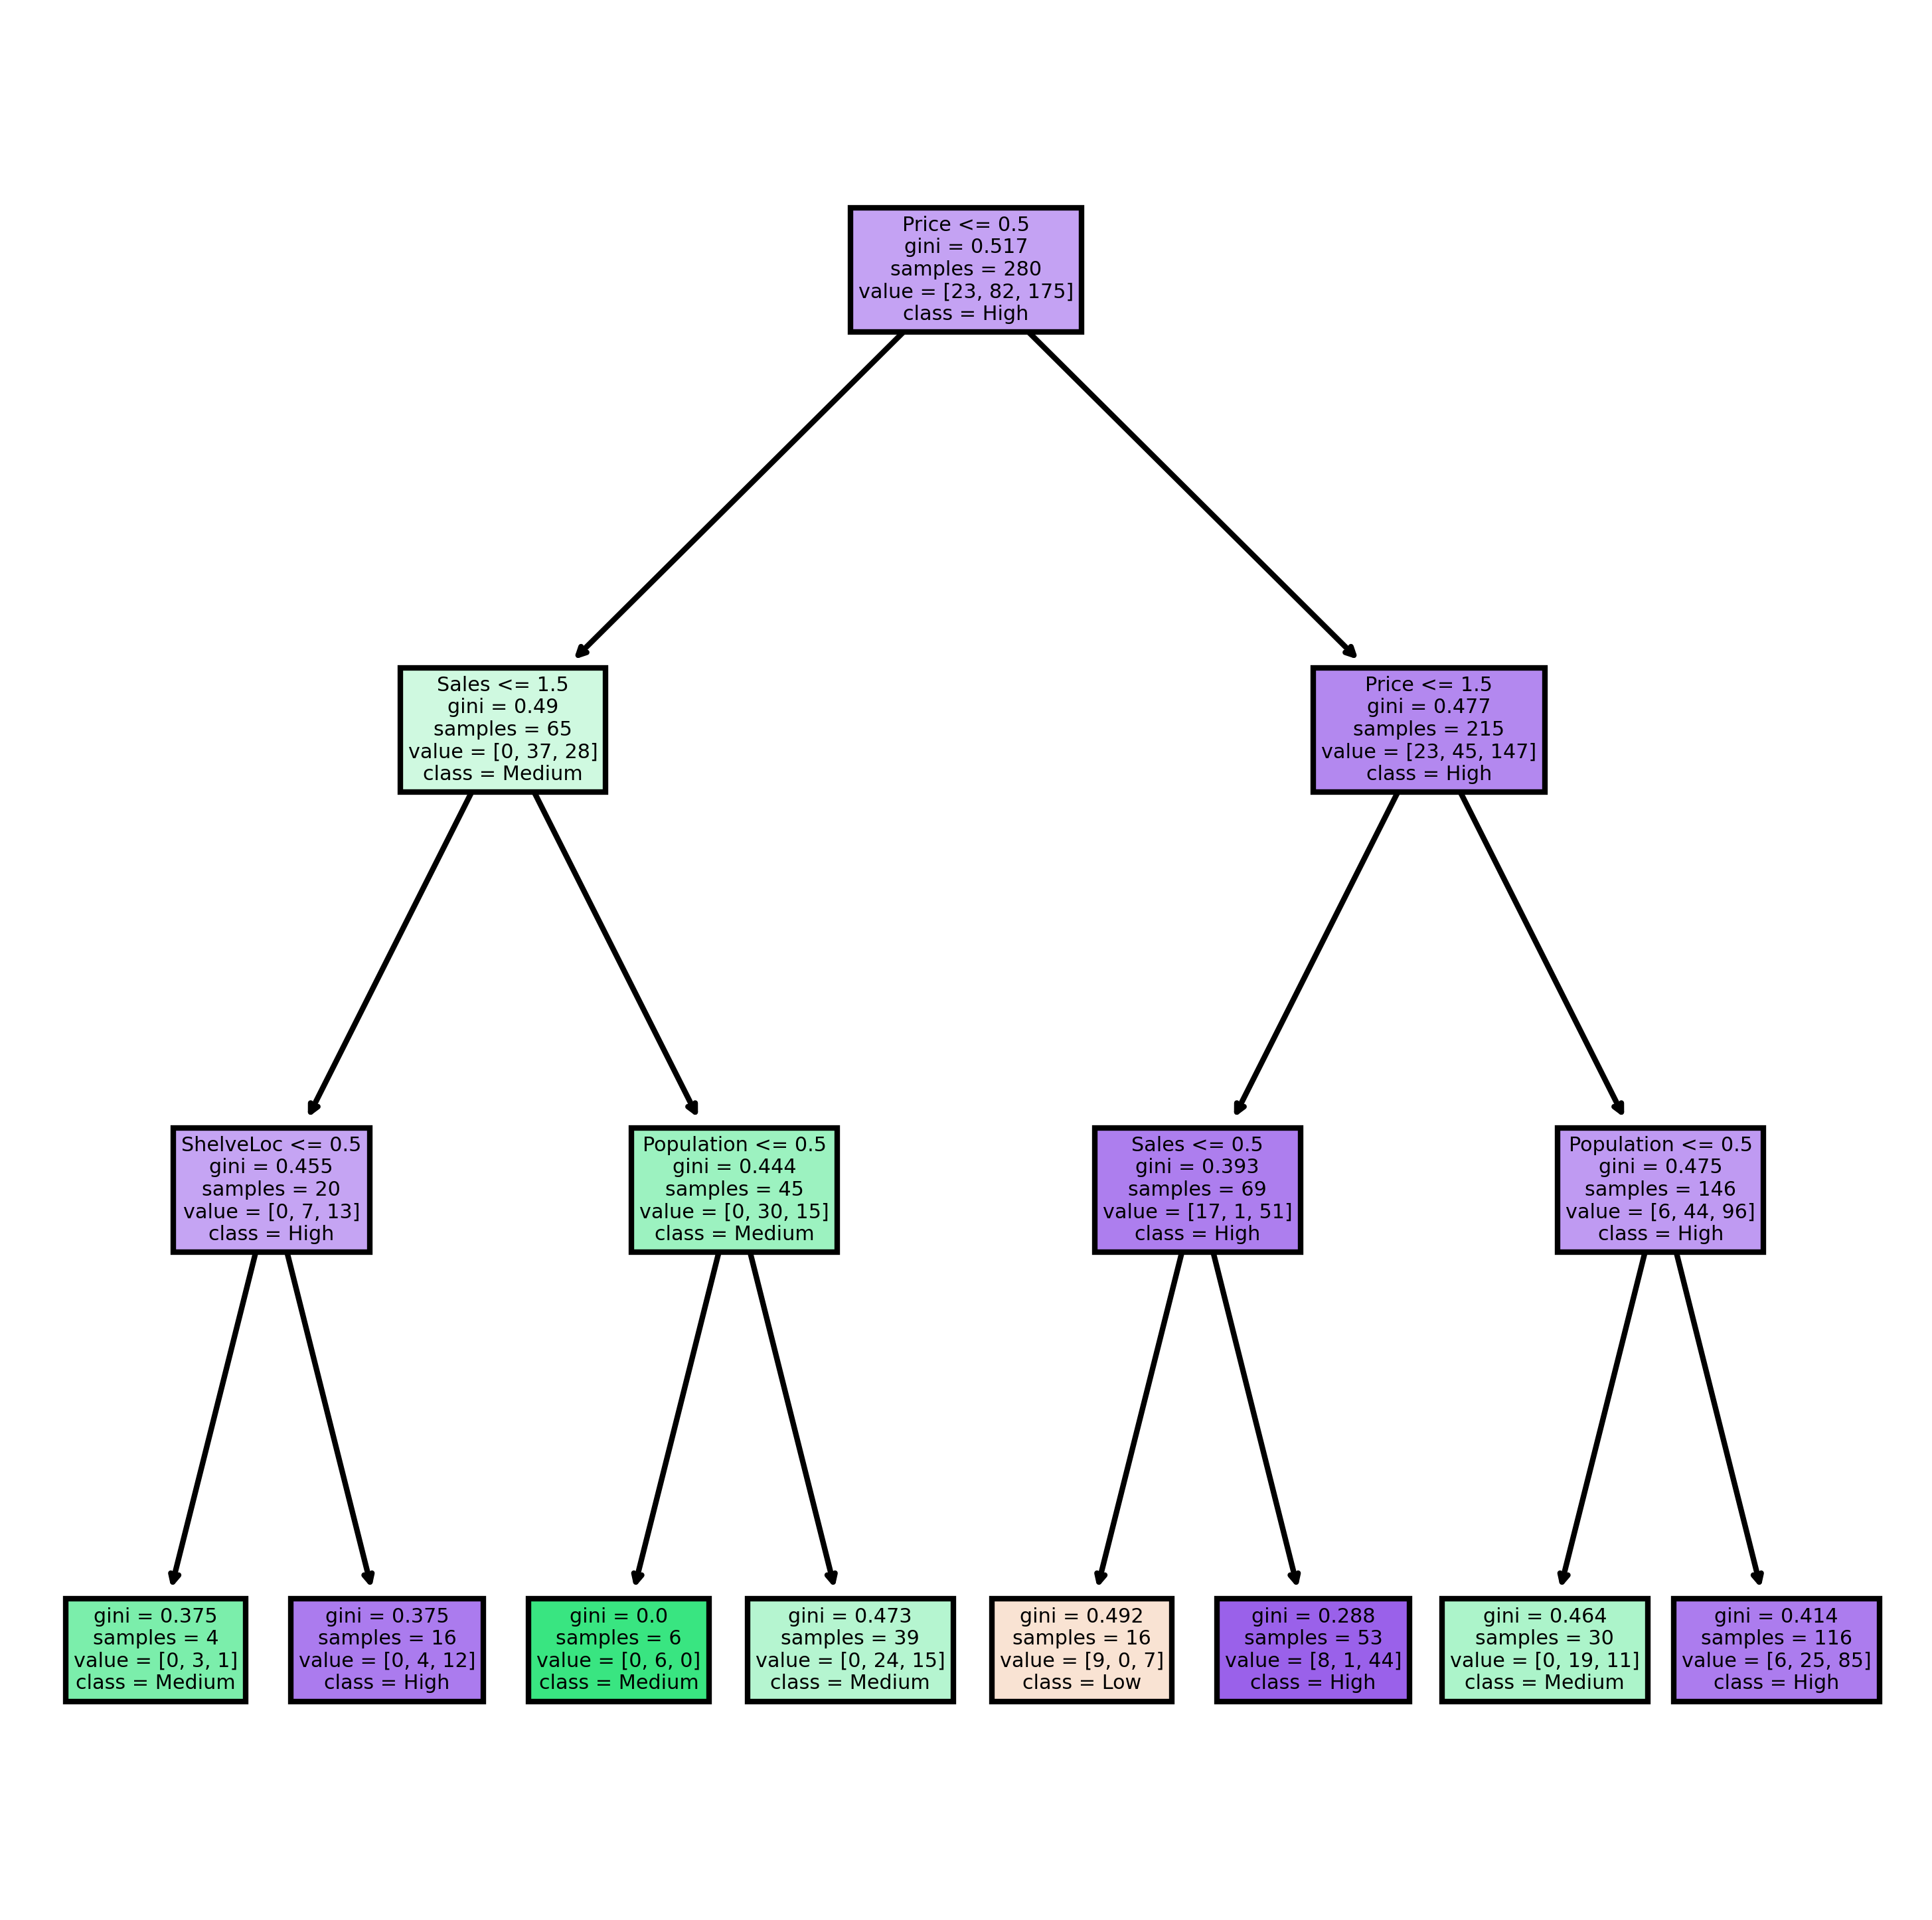

In [45]:
fn = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn = ['Low','Medium','High']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6,6), dpi = 600)
plt.show(tree.plot_tree(DTC, feature_names = fn, class_names = cn, filled = True))

In [46]:
np.mean(Y_pred_test == Y_test)

0.6416666666666667